# TRAITEMENT DES DONNEES REQUEST ET APPRENTISSAGE DE MODELES

## PREPROCESSING

In [1]:
!pip install pandas-profiling==2.8.0 > /dev/null 2>&1
!pip install pandas==0.25 > /dev/null 2>&1
!pip install numpy==1.16.5 > /dev/null 2>&1

REDEMARRER L'ENVIRONNEMENT D'EXECUTION

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#!ls "/content/gdrive/My Drive/"

In [2]:
import pandas as pd
import numpy as np
import panel as pn

data = pd.read_csv('/content/gdrive/My Drive/analyse/result_requetes.csv')
#data = pd.read_csv('result_requetes.csv')
#data.head()

In [3]:
#On affecte le bon type aux variables qualitatives
data["city"]=pd.Categorical(data["city"],ordered=False)
data["language"]=pd.Categorical(data["language"],ordered=False)
data["group"]=pd.Categorical(data["group"],ordered=False)
data["brand"]=pd.Categorical(data["brand"],ordered=False)

data["mobile"]=pd.Categorical(data["mobile"],ordered=False)
data["parking"]=pd.Categorical(data["parking"],ordered=False)
data["pool"]=pd.Categorical(data["pool"],ordered=False)
data["children_policy"]=pd.Categorical(data["children_policy"],ordered=False)

data["hotel_id"]=pd.Categorical(data["hotel_id"],ordered=False)
data["avatar_id"]=pd.Categorical(data["avatar_id"],ordered=False)

data["price"]=pd.DataFrame(data["price"], dtype=float)

#data.dtypes
#data.head()

##PANDAS PROFILING

In [ ]:
from pandas_profiling import ProfileReport

ProfileReport(data[["price","nb_requete","city","date","language","mobile","stock","hotel_id","group","brand","parking","pool","children_policy"]], sort="None")

## APPRENTISSAGE DE MODELE

In [4]:
from sklearn.preprocessing import OneHotEncoder
X=data[["city","language","mobile","hotel_id","group","brand","parking","pool","children_policy"]]
enc = OneHotEncoder()
enc.fit(X)

OneHotEncoder()

In [5]:
Xenc=enc.transform(X).toarray()
dataDum=pd.DataFrame(Xenc, columns=enc.get_feature_names_out())
#dataDum

In [6]:
dataQuant = data[["nb_requete","date","stock"]]
dfC = pd.concat([dataQuant,dataDum],axis=1)
#dfC

In [7]:
Y = data[["price"]]

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dfC, Y, test_size=0.1, random_state=0)

In [9]:
y_train = np.ravel(y_train)

In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

#n_estimators + grand? 100 par défaut
#max_features?
#max_depth?
rf = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(),
    #RandomForestRegressor(max_depth=10),
    #GridSearchCV(RandomForestRegressor(),[{"n_estimators":[100,300,500],"max_features":[1.,0.5,0.2]}],cv=5,n_jobs=-1),
    #GridSearchCV(RandomForestRegressor(),[{"max_features":[1.,0.5,0.2]}],cv=5,n_jobs=-1),
)

#n_estimators + grand? 100 par défaut
#max_features?
#max_depth? 3 par défaut
xgb = make_pipeline(
    StandardScaler(),
    GradientBoostingRegressor(),
    #GridSearchCV(GradientBoostingRegressor(),[{"n_estimators":[100,300,500],"max_features":[1.,0.5,0.2]}],cv=5,n_jobs=-1),
    #GridSearchCV(GradientBoostingRegressor(),[{"max_features":[1.,0.5,0.2]}],cv=5,n_jobs=-1),
)

In [18]:
rf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [19]:
#?? print("Meilleur score = %f, Meilleur paramètre = %s" % (rf.best_score_,rf.best_params_))

In [20]:
print(f"Random forest score: {rf.score(X_test, y_test):.2f}")

Random forest score: 1.00


In [26]:
from joblib import dump, load
dump(rf, 'RF1_model_saved.joblib')
#rf_loaded = load('RF1_model_saved.joblib')

['./RF1_model_saved.joblib']

In [22]:
xgb.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor', GradientBoostingRegressor())])

In [23]:
#?? print("Meilleur score = %f, Meilleur paramètre = %s" % (xgb.best_score_,xgb.best_params_))

In [24]:
print(f"XGB score: {xgb.score(X_test, y_test):.2f}")

XGB score: 0.91


In [25]:
from joblib import dump, load
dump(xgb, 'XGB1_model_saved.joblib')
#xgb_loaded = load('XGB1_model_saved.joblib')

['XGB1_model_saved.joblib']

RandomizedSearchCV ???

#TEST DES MODELES SUR LE FICHIER DEFI

In [27]:
test = pd.read_csv('/content/gdrive/My Drive/analyse/test_set3.csv')
test.head()

,nb_requete,index,order_requests,city,date,language,mobile,avatar_id,hotel_id,stock,group,brand,parking,pool,children_policy
0,1,0,1,vilnius,21,romanian,0,1,161,46,Boss Western,J.Halliday Inn,1,0,0
1,1,1,1,vilnius,21,romanian,0,1,187,32,Accar Hotels,Marcure,1,1,0
2,1,2,1,vilnius,21,romanian,0,1,279,12,Independant,Independant,1,0,0
3,1,3,1,vilnius,21,romanian,0,1,395,10,Accar Hotels,Ibas,0,0,0
4,1,4,1,vilnius,21,romanian,0,1,488,42,Accar Hotels,Safitel,1,1,1


In [28]:
#On affecte le bon type aux variables qualitatives
test["city"]=pd.Categorical(test["city"],ordered=False)
test["language"]=pd.Categorical(test["language"],ordered=False)
test["group"]=pd.Categorical(test["group"],ordered=False)
test["brand"]=pd.Categorical(test["brand"],ordered=False)

test["mobile"]=pd.Categorical(test["mobile"],ordered=False)
test["parking"]=pd.Categorical(test["parking"],ordered=False)
test["pool"]=pd.Categorical(test["pool"],ordered=False)
test["children_policy"]=pd.Categorical(test["children_policy"],ordered=False)

test["hotel_id"]=pd.Categorical(test["hotel_id"],ordered=False)
test["avatar_id"]=pd.Categorical(test["avatar_id"],ordered=False)

#test["price"]=pd.DataFrame(test["price"], dtype=float)

#test.dtypes
#test.head()

In [29]:
T=test[["city","language","mobile","hotel_id","group","brand","parking","pool","children_policy"]]
Tenc=enc.transform(T).toarray()

In [30]:
testDum=pd.DataFrame(Tenc, columns=enc.get_feature_names_out())
testDum

,city_amsterdam,city_copenhagen,city_madrid,city_paris,city_rome,city_sofia,city_valletta,city_vienna,city_vilnius,language_austrian,...,brand_Royal Lotus,brand_Safitel,brand_Tripletree,parking_0,parking_1,pool_0,pool_1,children_policy_0,children_policy_1,children_policy_2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6639,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
6640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
6641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
6642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [31]:
testQuant = test[["nb_requete","date","stock"]]
Xtest = pd.concat([testQuant,testDum],axis=1)
Xtest.head()

,nb_requete,date,stock,city_amsterdam,city_copenhagen,city_madrid,city_paris,city_rome,city_sofia,city_valletta,...,brand_Royal Lotus,brand_Safitel,brand_Tripletree,parking_0,parking_1,pool_0,pool_1,children_policy_0,children_policy_1,children_policy_2
0,1,21,46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,1,21,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,1,21,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,1,21,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1,21,42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [32]:
#Xr_test = scaler.transform(Xtest) #APPLIQUER LA NORMALISATION

In [33]:
Yprev1=rf.predict(Xtest)

In [34]:
Yprev10=np.around(Yprev1, decimals=1)

In [35]:
#len(Yprev10)
Yindice1 = pd.DataFrame(np.arange(0,len(Yprev10)),columns = ['index'])

In [41]:
Yprice1=pd.DataFrame(Yprev10,columns = ['price'])
Ysub1=Yindice1.join(Yprice1, on=None, how='right', lsuffix='', rsuffix='', sort=False)
Ysub1.to_csv('/content/gdrive/My Drive/analyse/sample_submissionRF1.csv', index= False)

In [37]:
Yprev2=xgb.predict(Xtest)

In [38]:
Yprev20=np.around(Yprev2, decimals=1)

In [39]:
#len(Yprev20)
Yindice2 = pd.DataFrame(np.arange(0,len(Yprev20)),columns = ['index'])

In [42]:
Yprice2=pd.DataFrame(Yprev20,columns = ['price'])
Ysub2=Yindice2.join(Yprice2, on=None, how='right', lsuffix='', rsuffix='', sort=False)
Ysub2.to_csv('/content/gdrive/My Drive/analyse/sample_submissionXGB1.csv', index= False)

#INTERPRETABILITE

## Features importance

In [43]:
!pip install eli5 > /dev/null 2>&1

In [48]:
#feature_names = enc.get_feature_names_out()
feature_names = dfC.columns

In [47]:
import eli5
from eli5.sklearn import PermutationImportance
import matplotlib.pyplot as plt
import seaborn as sns

features_importance_dict = {}
for model, name in zip([rf,xgb], ['random forest','xgboost']):
  plt.figure()
  permumtation_impor = PermutationImportance(model, random_state=0).fit(X_test, y_test)
  
  features_importance = {'Feature_name':feature_names, 'Importance':permumtation_impor.feature_importances_}  
  features_importance = pd.DataFrame(features_importance) 
  features_importance = features_importance.sort_values(['Importance'], ascending=False) 
  features_importance_dict[name] = features_importance
  ax = sns.barplot(x="Importance", y="Feature_name", data=features_importance[0:30])
  plt.title(name)

ValueError: ignored

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'random forest')

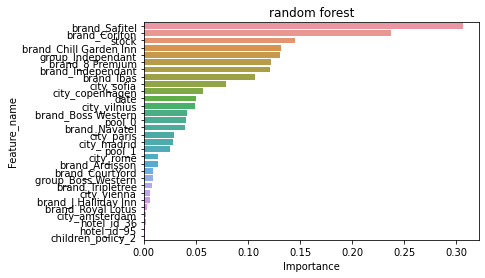

In [49]:
features_importance = {'Feature_name':feature_names, 'Importance':permumtation_impor.feature_importances_}  
features_importance = pd.DataFrame(features_importance) 
features_importance = features_importance.sort_values(['Importance'], ascending=False) 
features_importance_dict[name] = features_importance
ax = sns.barplot(x="Importance", y="Feature_name", data=features_importance[0:30])
plt.title(name)

##PDP et ICE plots

In [50]:
!pip install pdpbox > /dev/null 2>&1

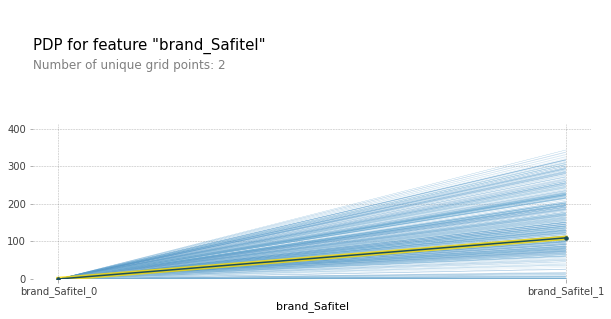

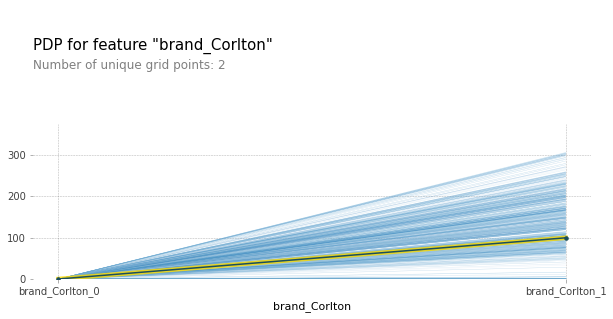

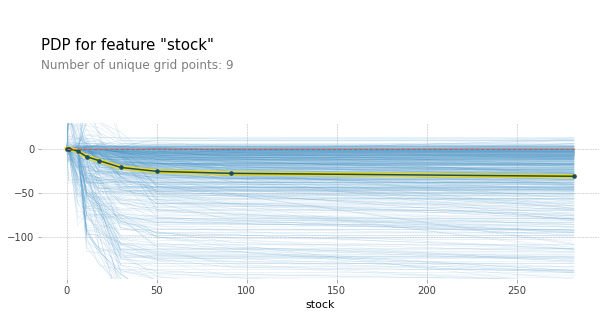

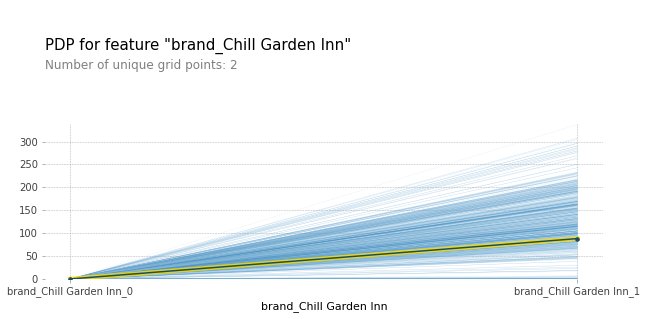

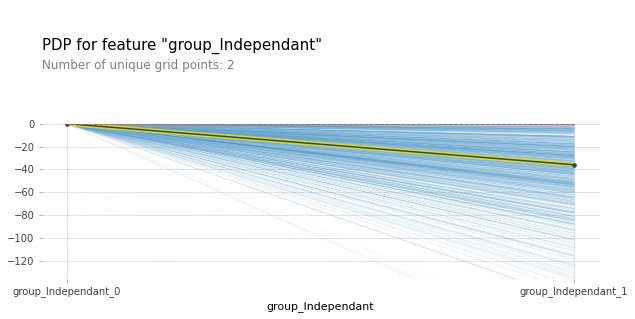

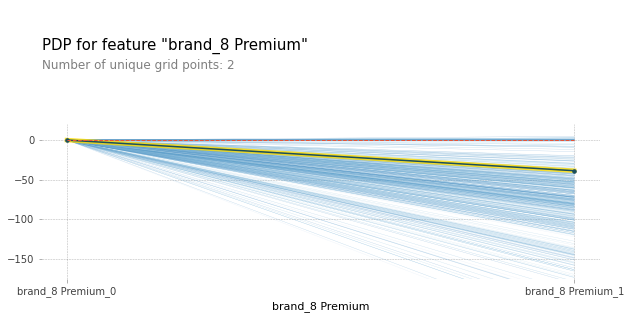

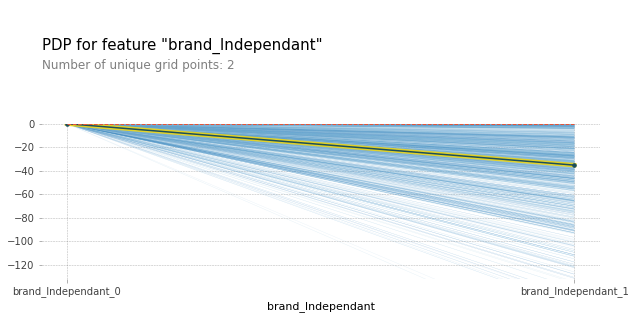

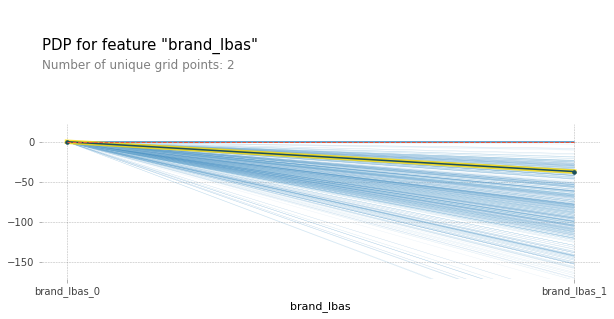

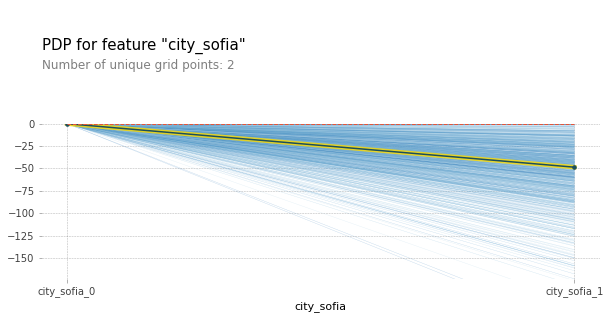

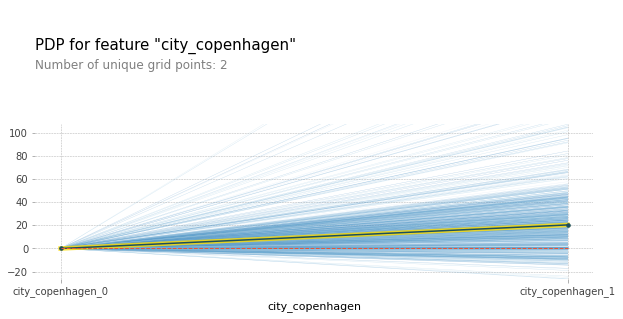

In [51]:
from pdpbox import pdp, get_dataset, info_plots
model = rf #xgb
model_name = 'random forest' #'xgb'

top_10_features = features_importance_dict[model_name].Feature_name[:10].values
for i, feature in enumerate(top_10_features, 1):
  pdp_feat = pdp.pdp_isolate(model=model, dataset=X_test, model_features=feature_names, feature=feature)
  pdp.pdp_plot(pdp_feat, feature, plot_lines=True, frac_to_plot=0.1, figsize=(10,5))

In [ ]:
features_to_plot = ['date', 'brand_Corlton'] #???
inter1 = pdp.pdp_interact(model=model, dataset=X_test, model_features=feature_names, features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

##SHAP

In [52]:
!pip install shap > /dev/null 2>&1

In [ ]:
import shap
shap.initjs() #needed to plot results directly on the notebook

idx = 1 # index of the instance we want to explain

explainer = shap.KernelExplainer(rf.predict, X_test)
#shap_values = explainer.shap_values(X_test.iloc[0,:])
#shap.force_plot(explainer.expected_value, shap_values, X_test.iloc[0,:])

In [ ]:
shap_values = explainer.shap_values(X_test.iloc[0:20,:]) #To speed up we just compute the shap values for 100 exemples
shap.summary_plot(shap_values, X_test.iloc[0:20,:])

##LIME

In [ ]:
!pip install lime > /dev/null 2>&1

In [ ]:
import lime
import lime.lime_tabular

index = 0

explainer = lime.lime_tabular.LimeTabularExplainer(X_test.values, feature_names=feature_names, mode="regression")
exp = explainer.explain_instance(X_test.iloc[index], rf.predict, num_features=5, top_labels=1)
exp.show_in_notebook(show_table=True, show_all=True)